In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [2]:
from jupyterthemes import jtplot
jtplot.style()

In [3]:
data=pd.read_csv('C:/Users/ASUS/Desktop/data/used_car_train_20200313.csv')
test=pd.read_csv('C:/Users/ASUS/Desktop/data/used_car_testA_20200313.csv')

In [5]:
def change(data):
    index=data.columns 
    a=data.iloc[:,0]
    a=a.apply(lambda x:x.split(' '))
    a=a.apply(lambda x:np.array(x))

    al=[]
    for i in range(len(a)):
        al.extend(a[i])
        
    b=np.array(al).reshape(data.shape[0],a[1].shape[0])
    index=index[0].split(' ')
    data=pd.DataFrame(b,columns=index)
    return data
data=change(data)
test=change(test)

In [210]:
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])
test['city'] = test['regionCode'].apply(lambda x : str(x)[:-3])

In [211]:
def fillblink(data):
    data['bodyType']=data['bodyType'].replace('','0.0')
    data['fuelType']=data['fuelType'].replace('','0.0')
    data['gearbox']=data['gearbox'].replace('','0.0')
    data['notRepairedDamage']=data['notRepairedDamage'].replace('-','0.0')
    data['city']=data['city'].replace('','9')
    return data
data=fillblink(data)
test=fillblink(test)

In [118]:
data.drop(data[data['SaleID']=='38424'].index,inplace=True)

In [213]:
data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'city'],
      dtype='object')

In [214]:
stay=['SaleID', 'name', 'regDate', 'model',  
        'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate',  'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'city']

In [215]:
def toint(data,stay):
    for i in stay:
        data[i]=data[i].apply(lambda x:eval(x))
            
    return data
train=toint(data,stay)
test=toint(test,stay)

In [216]:
train['price']=train['price'].apply(lambda x:eval(x))

In [11]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

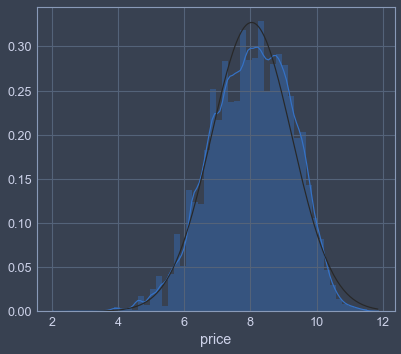

In [26]:
sns.distplot(np.log(train['price']),fit=norm)

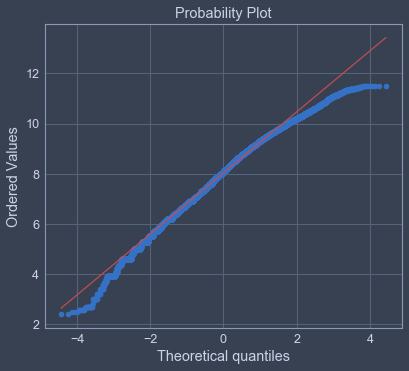

In [27]:
res = stats.probplot(np.log(data['price']), plot=plt)

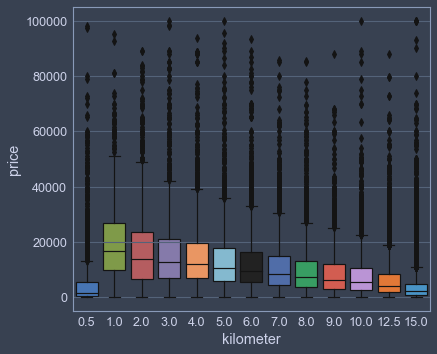

In [28]:
sns.boxplot(x='kilometer',y='price',data=data)

In [29]:
#train['power']=np.log(train['power']+1)
#test1['power']=np.log(test1['power']+1)

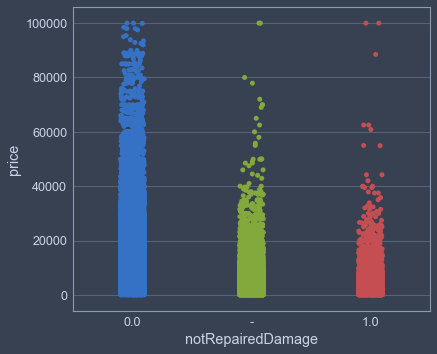

In [30]:
sns.stripplot(y='price',x='notRepairedDamage',data=data)

In [12]:
train['year']=train['regDate'].apply(lambda x:round(x/10000))
test['year']=test['regDate'].apply(lambda x:round(x/10000))

In [13]:
train['saleyear']=train['creatDate'].apply(lambda x:round(x/10000))
test['saleyear']=test['creatDate'].apply(lambda x:round(x/10000))

In [14]:
train['time']=train['saleyear']-train['year']
test['time']=test['saleyear']-test['year']

In [15]:
train['work']=train['time']*train['kilometer']
test['work']=test['time']*test['kilometer']

In [16]:
rest=[]
for i in train.columns:
    if i not in test1.columns:
        rest.append(i)

test2=test1

rest=np.array(rest)

rest.shape,test1.shape,train.shape

NameError: name 'test1' is not defined

In [21]:
a=np.zeros((50000,2))

a=pd.DataFrame(a)

a.columns=rest

test2=pd.concat([test1,a],axis=1)

b=np.array(train.columns)

b=list(b)

test1=test2[b]

In [17]:
train.shape,test.shape

((149999, 89), (50000, 88))

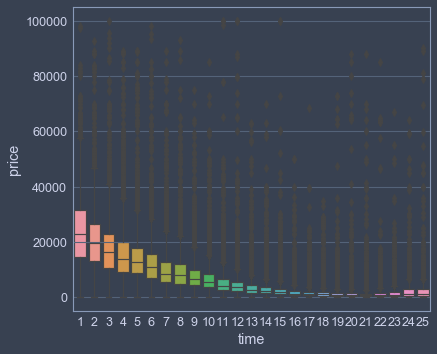

In [22]:
sns.boxplot(x='time',y='price',data=train)

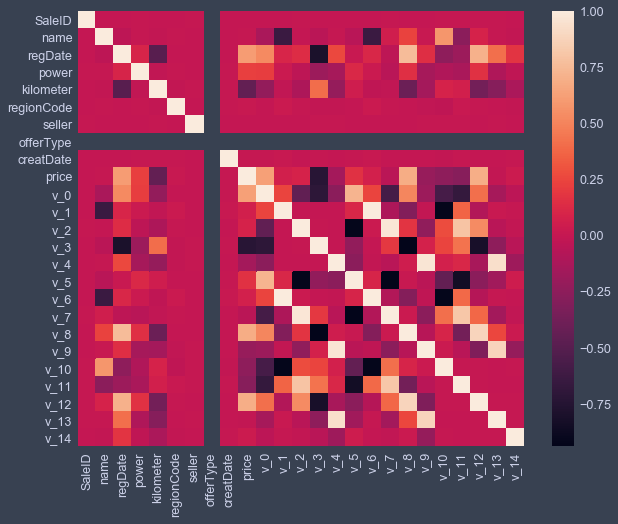

In [20]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data.corr())

In [35]:
test12=test1
train1=train

In [18]:
bin = [i*10 for i in range(31)]
train['power_bin'] = pd.cut(train['power'], bin, labels=False)
test['power_bin'] = pd.cut(test['power'], bin, labels=False)

In [19]:
train['power_bin']=train['power_bin'].fillna(30)
test['power_bin']=test['power_bin'].fillna(30)

In [20]:
unknown=['v_0','v_1','v_2'
        ,'v_3','v_4','v_5'
         ,'v_6','v_7','v_8'
         ,'v_9','v_10','v_11'
         ,'v_12','v_13','v_14']

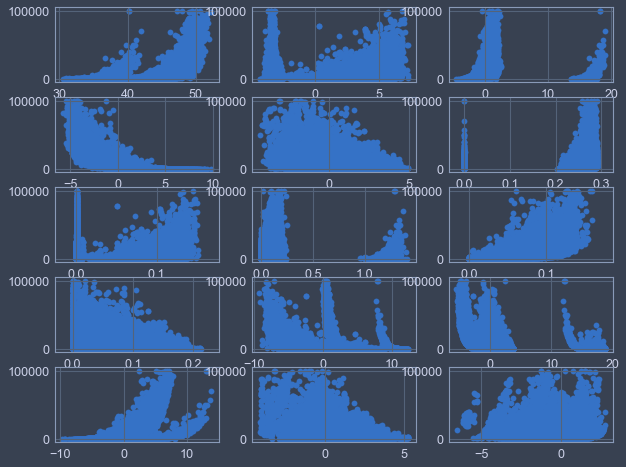

In [105]:
fig,ax=plt.subplots(figsize=(10,8))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.scatter(train[unknown[i]],(train['price']))

In [24]:
train.columns

Index(['SaleID', 'name', 'regDate', 'power', 'kilometer', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price',
       ...
       'gearbox_', 'gearbox_0.0', 'gearbox_1.0', 'notRepairedDamage_-',
       'notRepairedDamage_0.0', 'notRepairedDamage_1.0', 'year', 'saleyear',
       'time', 'work'],
      dtype='object', length=340)

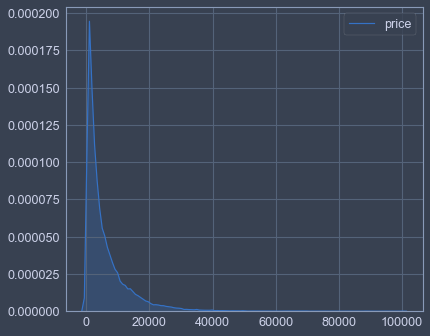

In [141]:
sns.kdeplot((train['price']),shade=True)

In [ ]:
ytrain=(train['price'])

In [6]:
ida=test['SaleID']

In [22]:
delete=['SaleID','regDate','creatDate','offerType','seller','power','regionCode']
xtrain=train.drop(delete,axis=1)
xtest=test.drop(delete,axis=1)

In [23]:
xtrain.drop(['year','saleyear'],axis=1,inplace=True)
xtest.drop(['year','saleyear'],axis=1,inplace=True)

In [24]:
xtest.shape,xtrain.shape

((50000, 80), (149999, 81))

In [25]:
xtrain.to_csv('C:/Users/ASUS/Desktop/xtrain.csv',index=False)
xtest.to_csv('C:/Users/ASUS/Desktop/xtest.csv',index=False)
ytrain.to_csv('C:/Users/ASUS/Desktop/ytrain.csv',index=False)

In [20]:
from sklearn.linear_model  import LinearRegression,Lasso
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm  import LinearSVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder

In [17]:
gbr=GradientBoostingRegressor(n_estimators=50,random_state=100)

In [34]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(xtrain,(ytrain),test_size=0.5,random_state=10)
xtrain2,xtest2,ytrain2,ytest2=train_test_split(xtrain1,ytrain1,test_size=0.5,random_state=10)

In [33]:
enc=OneHotEncoder()

In [35]:
gbr.fit(xtrain2,ytrain2)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=100, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
enc.fit(gbr.apply(xtrain2))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [45]:
new_train=enc.transform(gbr.apply(xtrain2))

new_train=new_train.toarray()

In [49]:
newtrain=np.concatenate([xtrain2,new_train],axis=1)

In [48]:
new_test=enc.transform(gbr.apply(xtest2))

new_test=new_test.toarray()

In [50]:
newtest=np.concatenate([xtest2,new_test],axis=1)

In [52]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [9]:
xtrain=pd.read_csv('C:/Users/ASUS/Desktop/xtrain.csv')
xtest=pd.read_csv('C:/Users/ASUS/Desktop/xtest.csv')
ytrain=pd.read_csv('C:/Users/ASUS/Desktop/ytrain.csv')

In [15]:
xtrain.drop('price',axis=1,inplace=True)

In [6]:
xtrain['年久失修']=0
xtest['年久失修']=0

In [7]:
xtrain['年久失修'][(xtrain['kilometer']==15.0)&(xtrain['notRepairedDamage']==0)]=1
xtest['年久失修'][(xtest['kilometer']==15.0)&(xtest['notRepairedDamage']==0)]=1

In [8]:
xtrain.columns

Index(['name', 'model', 'kilometer', 'notRepairedDamage', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'city', 'brand_0', 'brand_1', 'brand_10', 'brand_11',
       'brand_12', 'brand_13', 'brand_14', 'brand_15', 'brand_16', 'brand_17',
       'brand_18', 'brand_19', 'brand_2', 'brand_20', 'brand_21', 'brand_22',
       'brand_23', 'brand_24', 'brand_25', 'brand_26', 'brand_27', 'brand_28',
       'brand_29', 'brand_3', 'brand_30', 'brand_31', 'brand_32', 'brand_33',
       'brand_34', 'brand_35', 'brand_36', 'brand_37', 'brand_38', 'brand_39',
       'brand_4', 'brand_5', 'brand_6', 'brand_7', 'brand_8', 'brand_9',
       'bodyType_0.0', 'bodyType_1.0', 'bodyType_2.0', 'bodyType_3.0',
       'bodyType_4.0', 'bodyType_5.0', 'bodyType_6.0', 'bodyType_7.0',
       'fuelType_0.0', 'fuelType_1.0', 'fuelType_2.0', 'fuelType_3.0',
       'fuelType_4.0', 'fuelType_5.0', 'fuelType_6.0', 'gearbox_0.0',
       'gearbox

In [9]:
xtrain['豪车无坏']=0
xtest['豪车无坏']=0

In [10]:
xtrain['豪车无坏'][(xtrain['bodyType_0.0']==1)&(xtrain['notRepairedDamage']==1)]=1
xtest['豪车无坏'][(xtest['bodyType_0.0']==1)&(xtest['notRepairedDamage']==1)]=1

In [11]:
xtrain.drop('name',axis=1,inplace=True)
xtest.drop('name',axis=1,inplace=True)

In [12]:
xtrain['年路']=0
xtest['年路']=0
xtrain['年路']=xtrain['kilometer']/xtrain['time']
xtest['年路']=xtest['kilometer']/xtest['time']

In [57]:
newtrain.shape,newtest.shape,xtest1.shape,ytrain1.shape

((37499, 479), (37500, 479), (75000, 80), (74999, 1))

In [ ]:
sns.countplot(x='kilometer')

In [484]:
adam=Adam(learning_rate=0.05)

In [22]:
xtr=std.fit_transform(xtrain)
xte=std.transform(xtest)

In [15]:
ytrain=ytrain['price']

In [16]:
x,x_t,y,y_t=train_test_split(xtrain,(ytrain),test_size=0.2,random_state=10)

In [17]:
x.shape,x_t.shape,y.shape,y_t.shape

((119999, 82), (30000, 82), (119999,), (30000,))

In [18]:
model=Sequential()

model.add(Dense(units=256,input_dim=82,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='relu'))
model.compile(optimizer='adam',loss='mae')

model.fit(x,y,batch_size=250,epochs=200,validation_data=(x_t,y_t))

Train on 119999 samples, validate on 30000 samples
Epoch 1/200
119999/119999 [==============================] - 6s 48us/step - loss: 2341.5604 - val_loss: 1142.7108
Epoch 2/200
119999/119999 [==============================] - 2s 21us/step - loss: 1010.6853 - val_loss: 893.8412
Epoch 3/200
119999/119999 [==============================] - 2s 20us/step - loss: 859.6474 - val_loss: 817.0364
Epoch 4/200
119999/119999 [==============================] - 2s 20us/step - loss: 780.3100 - val_loss: 743.0168
Epoch 5/200
119999/119999 [==============================] - 2s 21us/step - loss: 724.1765 - val_loss: 707.1623
Epoch 6/200
119999/119999 [==============================] - 2s 20us/step - loss: 682.6603 - val_loss: 673.2887
Epoch 7/200
119999/119999 [==============================] - 2s 20us/step - loss: 655.2066 - val_loss: 624.3614
Epoch 8/200
119999/119999 [==============================] - 2s 20us/step - loss: 626.1378 - val_loss: 651.9791
Epoch 9/200
119999/119999 [=======================

119999/119999 [==============================] - 2s 19us/step - loss: 459.8787 - val_loss: 489.8593
Epoch 74/200
119999/119999 [==============================] - 2s 20us/step - loss: 460.6261 - val_loss: 485.4064
Epoch 75/200
119999/119999 [==============================] - 2s 20us/step - loss: 457.3571 - val_loss: 467.4106
Epoch 76/200
119999/119999 [==============================] - 2s 20us/step - loss: 453.1041 - val_loss: 486.6840
Epoch 77/200
119999/119999 [==============================] - 2s 20us/step - loss: 456.3983 - val_loss: 457.7626
Epoch 78/200
119999/119999 [==============================] - 2s 20us/step - loss: 454.5941 - val_loss: 459.7956
Epoch 79/200
119999/119999 [==============================] - 2s 20us/step - loss: 456.6769 - val_loss: 467.4940
Epoch 80/200
119999/119999 [==============================] - 2s 20us/step - loss: 454.9814 - val_loss: 464.4235
Epoch 81/200
119999/119999 [==============================] - 2s 20us/step - loss: 454.0699 - val_loss: 477.2

In [295]:
model.fit(x,y,batch_size=3000,epochs=1,validation_data=(x_t,y_t))



Train on 119999 samples, validate on 30000 samples
Epoch 1/1
119999/119999 [==============================] - 1s 5us/step - loss: 375.8403 - val_loss: 434.6161


In [219]:
y_pre=model.predict(xtest)

In [220]:
y_pre=y_pre.flatten()

In [221]:
result=pd.DataFrame({'SaleID':ida,'price':y_pre})

result.to_csv('C:/Users/ASUS/Desktop/福大彭于晏2.csv',index=False)

In [157]:
error=x_t[abs(y_pre-y_t)>600]

In [158]:
error.describe()

,model,kilometer,v_0,v_3,v_5,v_6,v_7,v_8,v_9,v_10,...,city_3,city_4,city_5,city_6,city_7,city_8,time,work,power_bin,年久失修
count,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,...,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000,8788.000000
mean,51.866409,11.828402,45.947232,-0.654961,0.257383,0.106526,0.102461,0.058104,0.055277,-4.479928,...,0.140305,0.102299,0.075558,0.047565,0.023213,0.000683,10.430473,134.928311,14.959149,0.482704
std,52.689618,4.286131,1.866091,1.668690,0.030159,0.022573,0.127728,0.024507,0.035255,1.753694,...,0.347323,0.303058,0.264304,0.212856,0.150589,0.026122,5.070062,85.127503,6.661603,0.499729
min,0.000000,0.500000,33.712139,-5.292419,0.000000,0.000005,0.000000,0.000000,0.000000,-8.798810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000
25%,13.000000,9.000000,44.905662,-1.890505,0.252289,0.101903,0.061490,0.039174,0.028039,-5.509520,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,63.000000,10.000000,0.000000
50%,31.000000,15.000000,46.053428,-0.761337,0.261987,0.109646,0.094675,0.058935,0.049094,-4.711151,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,135.000000,14.000000,0.000000
75%,75.000000,15.000000,47.103160,0.629213,0.268138,0.117101,0.124329,0.074405,0.080538,-3.843501,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,195.000000,18.000000,1.000000
max,238.000000,15.000000,52.304178,5.006668,0.291622,0.151420,1.387847,0.153849,0.180979,9.004795,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,375.000000,30.000000,1.000000


In [159]:
list(error.columns)

['model',
 'kilometer',
 'v_0',
 'v_3',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'brand_0',
 'brand_1',
 'brand_10',
 'brand_11',
 'brand_12',
 'brand_13',
 'brand_14',
 'brand_15',
 'brand_16',
 'brand_17',
 'brand_18',
 'brand_19',
 'brand_2',
 'brand_20',
 'brand_21',
 'brand_22',
 'brand_23',
 'brand_24',
 'brand_25',
 'brand_26',
 'brand_27',
 'brand_28',
 'brand_29',
 'brand_3',
 'brand_30',
 'brand_31',
 'brand_32',
 'brand_33',
 'brand_34',
 'brand_35',
 'brand_36',
 'brand_37',
 'brand_38',
 'brand_39',
 'brand_4',
 'brand_5',
 'brand_6',
 'brand_7',
 'brand_8',
 'brand_9',
 'bodyType_',
 'bodyType_0.0',
 'bodyType_1.0',
 'bodyType_2.0',
 'bodyType_3.0',
 'bodyType_4.0',
 'bodyType_5.0',
 'bodyType_6.0',
 'bodyType_7.0',
 'fuelType_',
 'fuelType_0.0',
 'fuelType_1.0',
 'fuelType_2.0',
 'fuelType_3.0',
 'fuelType_4.0',
 'fuelType_5.0',
 'fuelType_6.0',
 'gearbox_',
 'gearbox_0.0',
 'gearbox_1.0',
 'notRepairedDamage_-',
 'notRepaired

In [160]:
errory=y_t[abs(y_pre-y_t)>600]

In [102]:
errorall=pd.concat([error,errory],axis=1)

NameError: name 'error' is not defined

In [103]:
sns.countplot(x='bodytype_0',data=errorall)

NameError: name 'errorall' is not defined

In [100]:
sns.countplot(x='notRepairedDamage_0.0',data=errorall)

NameError: name 'errorall' is not defined